<a href="https://colab.research.google.com/github/ZeanIkLaurie/Circuits/blob/master/Cicruit%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [69]:
samples_per_unit = 10
maxT = 100
sampleN = maxT*samples_per_unit
T = np.linspace(0,maxT,sampleN+1)
R = [[0]*sampleN]*8
R[1] = 310+10*T
R[2] = 220+20*T
R[3] = 240+30*T
R[4] = [330]*(sampleN+1)
R[5] = [360]*(sampleN+1)
R[6] = [240]*(sampleN+1)
R[7] = [270]*(sampleN+1)

In [62]:
# Inciso (a):
def mtx_lsys(time):
  x = time*samples_per_unit
  for i in range(1,4): print('R[', i, '] a los', time, 'seg. :', R[i][x], 'Ohms')

ux_time = int(input("Dame un tiempo (en seg.): "))
mtx_lsys(ux_time)

Dame un tiempo (en seg.): 65
R[ 1 ] a los 65 seg. : 960.0 Ohms
R[ 2 ] a los 65 seg. : 1520.0 Ohms
R[ 3 ] a los 65 seg. : 2190.0 Ohms


In [63]:
# Inciso (b):
def mtx_solver(A):
  B = np.zeros([4,5])
  X = np.zeros(4)
  for k in range(3):
    for i in range(k+1,4):
      for j in range(k+1,5):
        B[i][j] = (A[k][j]/A[k][k])*A[i][k]
        A[i][j] -= B[i][j]
    for i in range(k+1,4): A[i][k] = 0
  X[3] = A[3][4]/A[3][3]
  for i in range(2,-1,-1):
    sum = 0.0
    for m in range(i+1,4):
      sum += A[i][m]*X[m]
      X[i] = (A[i][4]-sum)/A[i][i]
  return(X)

def AR(x): # x aquí es el tiempo, pero entre 0 y samplesN y no en segundos
  return([[R[1][x]+R[2][x],-R[2][x], 0, 0],
     [-R[2][x], R[2][x]+R[3][x]+R[4][x], -R[4][x], 0],
     [0, -R[4][x], R[4][x]+R[5][x]+R[6][x], R[6][x]],
     [0, 0, R[6][x], R[6][x]+R[7][x]]])

def ARV(x): # ésta es la matriz como se usa en el algoritmo, con V incluida
  return np.hstack( (AR(x), np.transpose([V])) )

V = [10, 0, 0, 12]
print(ARV(0))

I0 = mtx_solver(ARV(0))
print(I0)

[[ 530. -220.    0.    0.   10.]
 [-220.  790. -330.    0.    0.]
 [   0. -330.  930.  240.    0.]
 [   0.    0.  240.  510.   12.]]
[ 0.02024094  0.00330771 -0.0055755   0.02615318]


In [64]:
I0 = np.linalg.solve(AR(0),V)
print(I0)

[ 0.02024094  0.00330771 -0.0055755   0.02615318]


In [70]:
# Inciso (c)
I = [[]]*4
for i in range(sampleN+1):
  temp_I = mtx_solver(ARV(i))
  temp_I = np.transpose([temp_I])
  I = np.hstack((I,temp_I))
# Aquí I[n-1] corresponde a I sub n

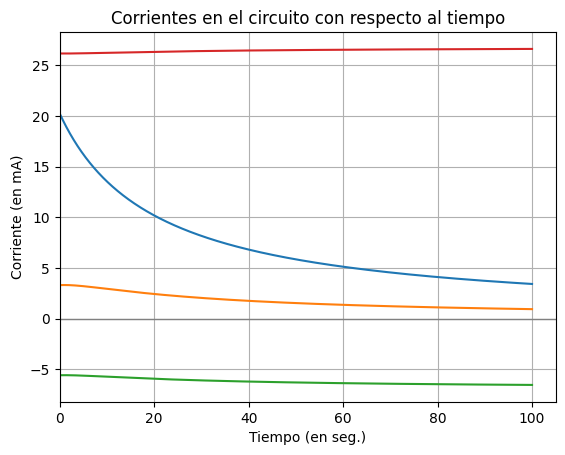

In [87]:
# Inciso (d)
for i in range(4): plt.plot(T,1000*I[i])

plt.title('Corrientes en el circuito con respecto al tiempo')
plt.xlabel('Tiempo (en seg.)')
plt.ylabel('Corriente (en mA)')
plt.xlim([0,105])
plt.axhline(linewidth=1, color='gray')
plt.grid()

plt.show()